##### Distance Transform

https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.htm

## Image Segementation with Watershed Algorithm

In [137]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\water_coins.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# noise removal - opening is just another name of erosion followed by dilation
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
print("Step 1 - Noise Removing with Opening Morphology")

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.8*dist_transform.max(),255,0)
print("Step 2 - Make sure foreground area with Distance Transformation and Thresholding")

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
print("Step 3 - Make sure background area with Dilation Morphology")

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
print("Step 4 - Finding Unknown Region")

ret , threshold = cv2.threshold(unknown , 0 , 255 , cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print("Step 5 - Thresholding to Unknown")

# Marker labelling
ret, markers = cv2.connectedComponents(threshold)
print("Step 6 - Make Marker Labelling")

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]

Step 1 - Noise Removing with Opening Morphology
Step 2 - Make sure foreground area with Distance Transformation and Thresholding
Step 3 - Make sure background area with Dilation Morphology
Step 4 - Finding Unknown Region
Step 5 - Thresholding to Unknown
Step 6 - Make Marker Labelling


### Watershed with OpenCV

In [138]:
cv2.imshow("Opening" ,opening)
cv2.imshow("Sure Background" ,sure_bg)
cv2.imshow("Distance Transform" ,dist_transform)
cv2.imshow("Sure Foreground" ,sure_fg)
cv2.imshow("Subtraction" ,unknown)
cv2.imshow("Thresholding" ,threshold)
cv2.imshow("WaterShed Image" ,img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Watershed with Matplotlib

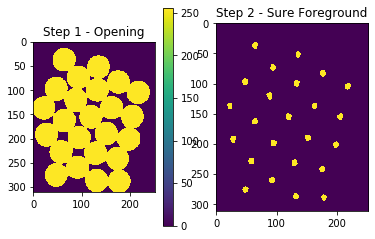

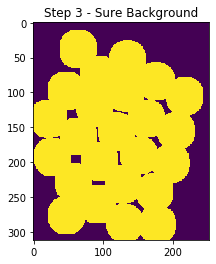

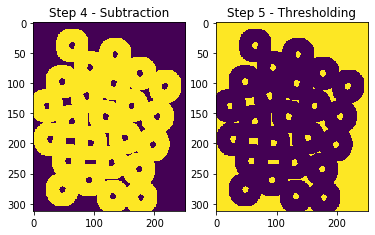

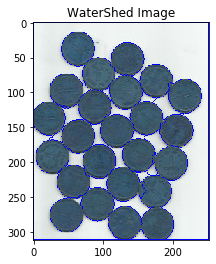

(Text(0.5, 1, 'WaterShed Image'),
 None)

In [139]:
plt.subplot(121),plt.title("Step 1 - Opening"),plt.imshow(opening),plt.colorbar
#plt.title("Distance Transform"),plt.imshow(dist_transform),plt.show()
plt.subplot(122),plt.title("Step 2 - Sure Foreground"),plt.imshow(sure_fg),plt.show()
plt.title("Step 3 - Sure Background"),plt.imshow(sure_bg),plt.show()
plt.subplot(121),plt.title("Step 4 - Subtraction"),plt.imshow(unknown)
plt.subplot(122),plt.title("Step 5 - Thresholding"),plt.imshow(threshold),plt.show()
plt.title("WaterShed Image"),plt.imshow(img),plt.show()